In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torchvision import models,transforms
from torchvision.datasets import ImageFolder

In [2]:
is_cuda = False
if torch.cuda.is_available():
    is_cuda = True

# Load data

- Dataset can be downloaded [here](http://www.vision.caltech.edu/Image_Datasets/Caltech101).

In [3]:
path = 'C:/Users/Yeonkang/Desktop/Deep_Learning/Image_Recognition/Vanilla_CNN/Python/data/101_ObjectCategories'

In [4]:
simple_transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), 
                                       transforms.Normalize([0.576,0.537,0.500],[0.224,0.196,0.188])])
train = ImageFolder(os.path.join(path,'train'), simple_transform)
valid = ImageFolder(os.path.join(path,'valid'), simple_transform)

In [5]:
train.class_to_idx

{'Faces': 0,
 'Faces_easy': 1,
 'Leopards': 2,
 'Motorbikes': 3,
 'accordion': 4,
 'airplanes': 5,
 'anchor': 6,
 'ant': 7,
 'barrel': 8,
 'bass': 9,
 'beaver': 10,
 'binocular': 11,
 'bonsai': 12,
 'brain': 13,
 'brontosaurus': 14,
 'buddha': 15,
 'butterfly': 16,
 'camera': 17,
 'cannon': 18,
 'car_side': 19,
 'ceiling_fan': 20,
 'cellphone': 21,
 'chair': 22,
 'chandelier': 23,
 'cougar_body': 24,
 'cougar_face': 25,
 'crab': 26,
 'crayfish': 27,
 'crocodile': 28,
 'crocodile_head': 29,
 'cup': 30,
 'dalmatian': 31,
 'dollar_bill': 32,
 'dolphin': 33,
 'dragonfly': 34,
 'electric_guitar': 35,
 'elephant': 36,
 'emu': 37,
 'euphonium': 38,
 'ewer': 39,
 'ferry': 40,
 'flamingo': 41,
 'flamingo_head': 42,
 'garfield': 43,
 'gerenuk': 44,
 'gramophone': 45,
 'grand_piano': 46,
 'hawksbill': 47,
 'headphone': 48,
 'hedgehog': 49,
 'helicopter': 50,
 'ibis': 51,
 'inline_skate': 52,
 'joshua_tree': 53,
 'kangaroo': 54,
 'ketch': 55,
 'lamp': 56,
 'laptop': 57,
 'llama': 58,
 'lobster': 5

In [6]:
def imshow(inp):
    inp = inp.numpy().transpose((1,2,0))
    mean,std = np.array([0.576,0.537,0.500]),np.array([0.224,0.196,0.188])
    inp = std * inp + mean
    inp = np.clip(inp,0,1)
    plt.imshow(inp)

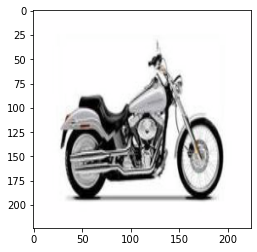

In [7]:
imshow(train[1000][0])

In [8]:
train_data_loader = torch.utils.data.DataLoader(train, batch_size=16, shuffle=True, num_workers=3)
valid_data_loader = torch.utils.data.DataLoader(valid, batch_size=16, shuffle=True, num_workers=3)

# Adjust VGG16

## Change *out_features* of the last linear layer

In [ ]:
features = vgg.features
for param in vgg.features.parameters():
    param.requires_grad = False
    
vgg.classifier[6].out_features = 101

In [ ]:
def fit(epoch, model, data_loader, phase='training', volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile=True
    running_loss = 0.0
    running_correct = 0
    
    for batch_idx,(data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        data,target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output,target)
        
        running_loss += F.cross_entropy(output, target, reduction='mean').data
        preds = output.data.max(dim=1,keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
    
    loss = running_loss.item()/len(data_loader.dataset)
    accuracy = 100. * running_correct.item()/len(data_loader.dataset)
    
    print(f'{phase} loss is {loss:{5}.{2}} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)}{accuracy:{10}.{4}}')
    return loss,accuracy

In [ ]:
if is_cuda:
    vgg = vgg.cuda()

In [ ]:
optimizer = optim.SGD(vgg.classifier.parameters(), lr=0.0001, momentum=0.5)
train_losses,train_accuracy = [],[]
val_losses,val_accuracy = [],[]

for epoch in range(1,10):
    train_epoch_loss,train_epoch_accuracy = fit(epoch, vgg, train_data_loader, phase='training')
    val_epoch_loss,val_epoch_accuracy = fit(epoch, vgg, valid_data_loader, phase='validation')
    train_losses.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

In [ ]:
plt.plot(range(1,len(train_losses)+1),train_losses, 'bo', label='train')
plt.plot(range(1,len(val_losses)+1),val_losses, 'r', label='validation')
plt.title('Loss')
plt.legend()

In [ ]:
plt.plot(range(1,len(train_accuracy)+1),train_accuracy, 'bo', label='train')
plt.plot(range(1,len(val_accuracy)+1),val_accuracy, 'r', label='validation')
plt.title('Accuracy')
plt.legend()

## Change *p* of dropout

In [ ]:
for layer in vgg.classifier.children():
    if type(layer) == nn.Dropout:
        layer.p = 0.2

In [ ]:
train_losses,train_accuracy = [],[]
val_losses,val_accuracy = [],[]

for epoch in range(1,3):
    train_epoch_loss,train_epoch_accuracy = fit(epoch, vgg, train_data_loader, phase='training')
    val_epoch_loss,val_epoch_accuracy = fit(epoch, vgg, valid_data_loader, phase='validation')
    train_losses.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

## Data Augmentation

In [ ]:
aug_transform = transforms.Compose([transforms.Resize((224,224)), transforms.RandomHorizontalFlip(),
                                    transforms.RandomRotation(0.2), transforms.ToTensor(),
                                    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
train = ImageFolder(os.path.join(path,'train'), aug_transform)
valid = ImageFolder(os.path.join(path,'valid'), aug_transform)

In [ ]:
train_losses,train_accuracy = [],[]
val_losses,val_accuracy = [],[]

for epoch in range(1,3):
    train_epoch_loss,train_epoch_accuracy = fit(epoch, vgg, train_data_loader, phase='training')
    val_epoch_loss,val_epoch_accuracy = fit(epoch, vgg, valid_data_loader, phase='validation')
    train_losses.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

# Calculate pre-convoluted features

In [9]:
vgg = models.vgg16(pretrained=True)
if is_cuda:
    vgg = vgg.cuda()

In [10]:
features = vgg.features
for param in features.parameters():
    param.requires_grad = False
    
vgg.classifier[6].out_features = 101

In [11]:
train_data_loader = torch.utils.data.DataLoader(train, batch_size=16, num_workers=3, shuffle=False)
valid_data_loader = torch.utils.data.DataLoader(valid, batch_size=16, num_workers=3, shuffle=False)

In [12]:
def preconvfeat(dataset, model):
    conv_features = []
    labels_list = []
    for data in dataset:
        inputs,labels = data
        if is_cuda:
            inputs, labels = inputs.cuda(),labels.cuda()       
        inputs,labels = Variable(inputs),Variable(labels)
        output = model(inputs)
        conv_features.extend(output.data.cpu().numpy())
        labels_list.extend(labels.data.cpu().numpy())
    conv_features = np.concatenate([[feat] for feat in conv_features])
    return (conv_features,labels_list)

In [13]:
conv_feat_train,labels_train= preconvfeat(train_data_loader, features)
conv_feat_val,labels_val= preconvfeat(valid_data_loader, features)

In [14]:
class My_dataset(Dataset):
    def __init__(self,feat,labels):
        self.conv_feat = feat
        self.labels = labels
    
    def __len__(self):
        return len(self.conv_feat)
    
    def __getitem__(self,idx):
        return self.conv_feat[idx],self.labels[idx]

In [15]:
train_feat_dataset = My_dataset(conv_feat_train, labels_train)
val_feat_dataset = My_dataset(conv_feat_val, labels_val)

In [16]:
train_feat_loader = torch.utils.data.DataLoader(train_feat_dataset, batch_size=16, shuffle=True)
val_feat_loader = torch.utils.data.DataLoader(val_feat_dataset, batch_size=16, shuffle=True)

In [17]:
def fit_numpy(epoch, model, data_loader, phase='training', volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile=True
    running_loss = 0.0
    running_correct = 0
    
    for batch_idx,(data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        data,target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        data = data.view(data.size(0), -1)
        output = model(data)
        loss = F.cross_entropy(output,target)
        running_loss += F.cross_entropy(output, target, reduction='sum').data
        preds = output.data.max(dim=1, keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
    
    loss = running_loss/len(data_loader.dataset)
    accuracy = 100. * running_correct.item()/len(data_loader.dataset)
    
    print(f'{phase} loss is {loss:{5}.{2}} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)}{accuracy:{10}.{4}}')
    return loss,accuracy

In [18]:
optimizer = optim.SGD(vgg.classifier.parameters(), lr=0.0001, momentum=0.5)
train_losses,train_accuracy = [],[]
val_losses,val_accuracy = [],[]

for epoch in range(1,10):
    epoch_loss,epoch_accuracy = fit_numpy(epoch, vgg.classifier, train_feat_loader, phase='training')
    val_epoch_loss ,val_epoch_accuracy = fit_numpy(epoch, vgg.classifier, val_feat_loader, phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

training loss is 1.1e+01 and training accuracy is 117/8000     1.462
validation loss is   7.1 and validation accuracy is 69/677     10.19
training loss is   6.6 and training accuracy is 1415/8000     17.69
validation loss is   5.4 and validation accuracy is 161/677     23.78
training loss is   5.4 and training accuracy is 1983/8000     24.79
validation loss is   4.8 and validation accuracy is 176/677      26.0
training loss is   4.8 and training accuracy is 2106/8000     26.32
validation loss is   4.3 and validation accuracy is 200/677     29.54
training loss is   4.3 and training accuracy is 2345/8000     29.31
validation loss is   3.9 and validation accuracy is 224/677     33.09
training loss is   3.9 and training accuracy is 2625/8000     32.81
validation loss is   3.6 and validation accuracy is 239/677      35.3
training loss is   3.5 and training accuracy is 2844/8000     35.55
validation loss is   3.3 and validation accuracy is 265/677     39.14
training loss is   3.3 and trainin

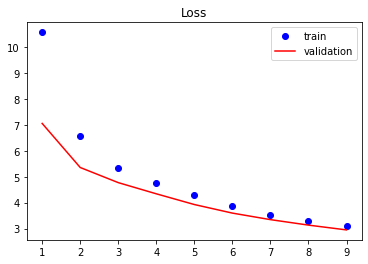

In [19]:
plt.plot(range(1,len(train_losses)+1),train_losses, 'bo', label='train')
plt.plot(range(1,len(val_losses)+1),val_losses, 'r', label='validation')
plt.title('Loss')
plt.legend()

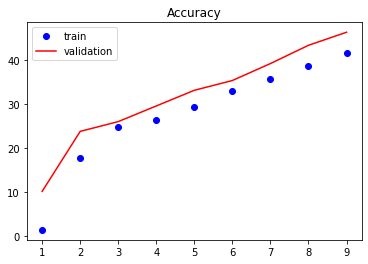

In [20]:
plt.plot(range(1,len(train_accuracy)+1),train_accuracy, 'bo', label='train')
plt.plot(range(1,len(val_accuracy)+1),val_accuracy, 'r', label='validation')
plt.title('Accuracy')
plt.legend()

# Understanding what CNN model learns

## Visualizing output from intermediate layer

In [21]:
train_data_loader = torch.utils.data.DataLoader(train,batch_size=16, num_workers=3, shuffle=False)
img,label = next(iter(train_data_loader))

In [22]:
def imshow(inp):
    inp = inp.numpy().transpose((1,2,0))
    mean,std = np.array([0.576,0.537,0.500]),np.array([0.224,0.196,0.188])
    inp = std * inp + mean
    inp = np.clip(inp,0,1)
    plt.imshow(inp)

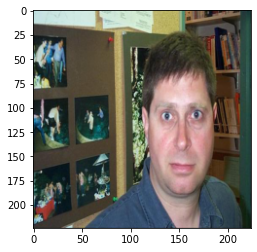

In [23]:
imshow(img[5])

In [24]:
img = img[5][None]

In [25]:
class LayerActivations():
    features=None
    
    def __init__(self,model,layer_num):
        self.hook = model[layer_num].register_forward_hook(self.hook_fn)
    
    def hook_fn(self,module,input,output):
        self.features = output.cpu().data.numpy()
    
    def remove(self):
        self.hook.remove()

In [26]:
vgg = models.vgg16(pretrained=True)
if is_cuda:
    vgg = vgg.cuda()

In [27]:
conv_out = LayerActivations(vgg.features,0)
o = vgg(Variable(img.cuda()))
conv_out.remove()
act = conv_out.features

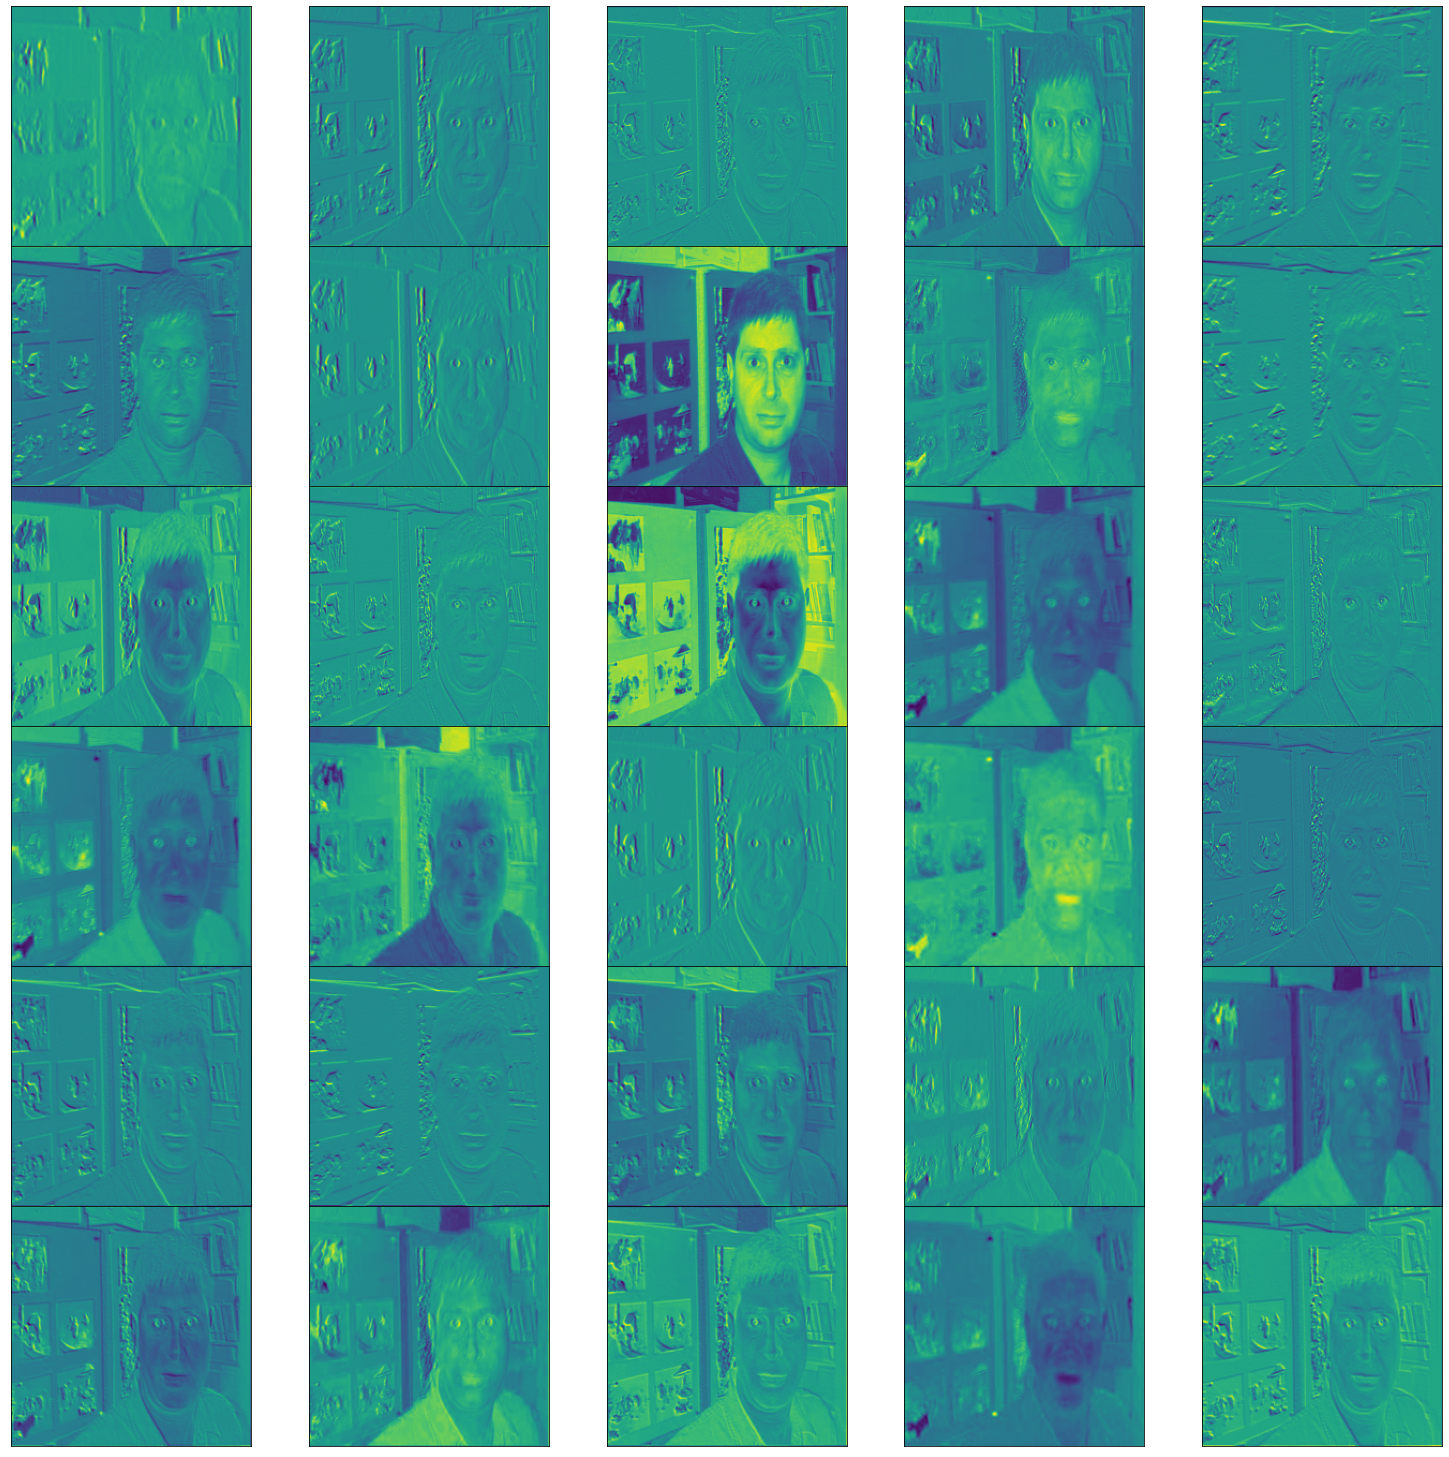

In [28]:
fig = plt.figure(figsize=(20,50))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0, wspace=0.2)

for i in range(30):
    ax = fig.add_subplot(12, 5, i+1, xticks=[], yticks=[])
    ax.imshow(act[0][i])

- Output of the first convolutional layer

In [29]:
conv_out = LayerActivations(vgg.features,26)
o = vgg(Variable(img.cuda()))
conv_out.remove()
act = conv_out.features

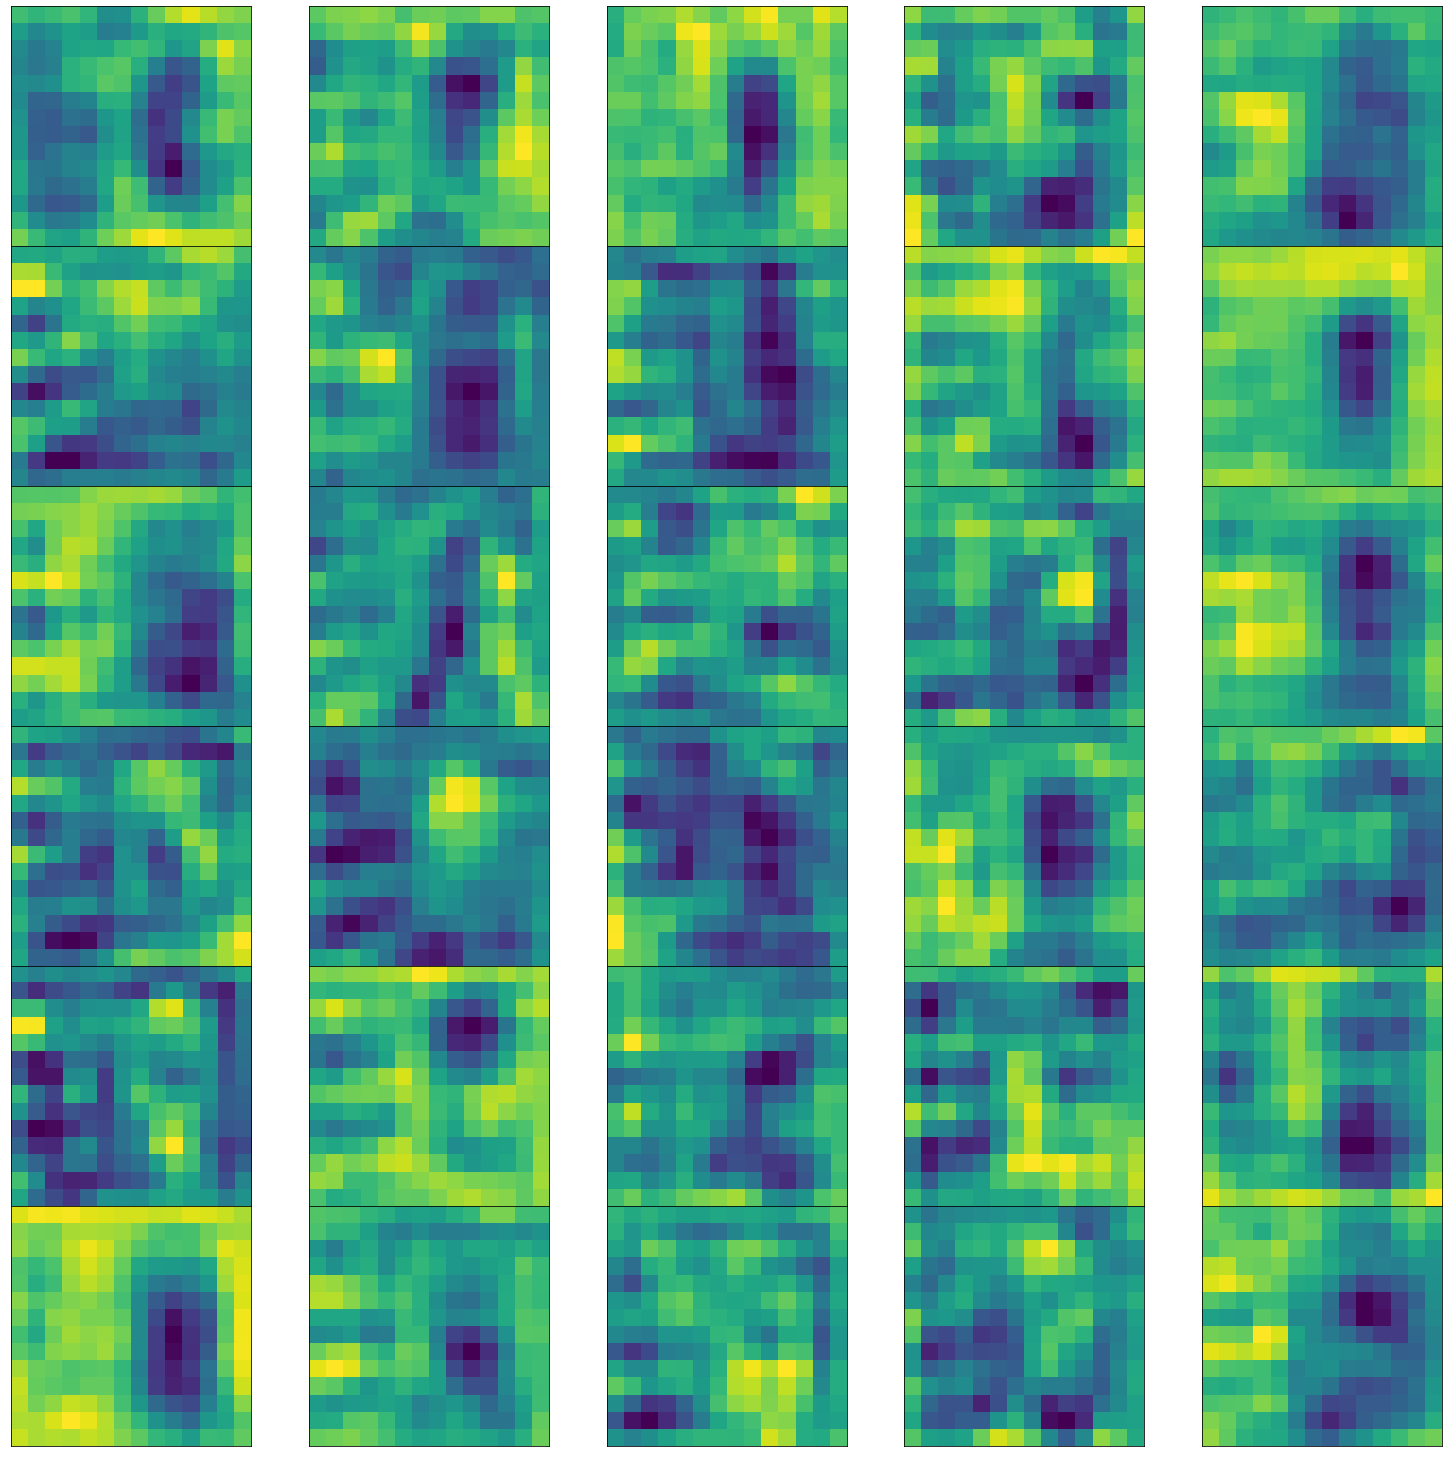

In [30]:
fig = plt.figure(figsize=(20,50))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0, wspace=0.2)

for i in range(30):
    ax = fig.add_subplot(12, 5, i+1, xticks=[], yticks=[])
    ax.imshow(act[0][i])

- Output of the last convolutional layer

## Visualizing weight from intermediate layer

In [31]:
vgg.state_dict().keys()

odict_keys(['features.0.weight', 'features.0.bias', 'features.2.weight', 'features.2.bias', 'features.5.weight', 'features.5.bias', 'features.7.weight', 'features.7.bias', 'features.10.weight', 'features.10.bias', 'features.12.weight', 'features.12.bias', 'features.14.weight', 'features.14.bias', 'features.17.weight', 'features.17.bias', 'features.19.weight', 'features.19.bias', 'features.21.weight', 'features.21.bias', 'features.24.weight', 'features.24.bias', 'features.26.weight', 'features.26.bias', 'features.28.weight', 'features.28.bias', 'classifier.0.weight', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias', 'classifier.6.weight', 'classifier.6.bias'])

In [32]:
cnn_weights = vgg.state_dict()['features.0.weight'].cpu()

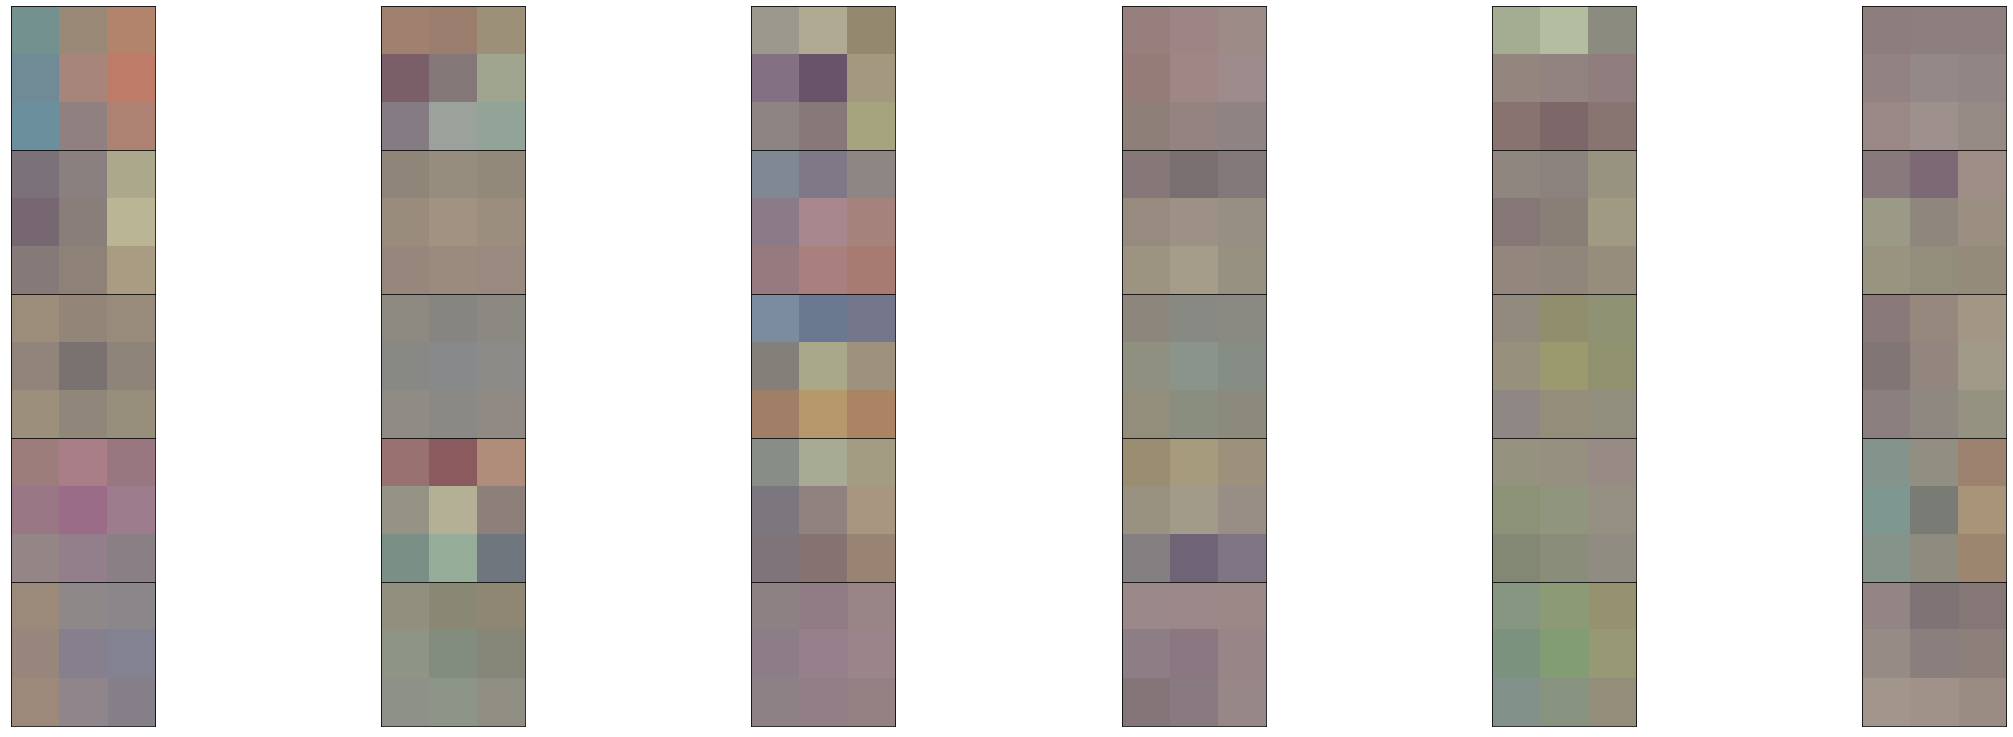

In [33]:
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0, wspace=0.2)

for i in range(30):
    ax = fig.add_subplot(12, 6, i+1, xticks=[], yticks=[])
    imshow(cnn_weights[i])

In [34]:
cnn_weights.shape

torch.Size([64, 3, 3, 3])